The following two liquid phase reactions occur at 60°C in a batch reactor.
$$A + R \rightarrow 2R$$
$$R \rightarrow S (catalysed)$$
The elementary autocatalytic reaction occurs spontaneously while the decomposition of $R$ occurs due to the presence of a solid catalyst. The rate constant of the first reaction is 0.05L/(mol.min) while the rate constant of the second reaction is 0.005L/(g.min). The following
was measured for a run where 2mol/L of $A$ and 0.1mol/L of $R$ were fed as initial feed.

|Time, min|\r_R, mol/L.min|
|---|---|
|0|0.0087|
|8|0.0154|
|16|0.0254|
|24|0.0322|
|32|0.0323|
|40|0.0221|
|48|0.0093|
|56|-0.0013|
|64|-0.0077|
|72|-0.0108|
|80|-0.0108|

What was the concentration of the solid catalyst? (3 g/L)

(Tip: the rate measurements should all be used to obtain the best ‘fitted’ answer. Once you have a Ci matrix from your numerical integration you can easily calculate the rate at times ti. For example if $A+B\rightarrow C$ elementary, you will have in Matlab: ra=k*Ci(:,1).*C(:,2); and this will give the rate values at the all the specified ti – note the .* operator)


In [1]:
from numpy import log, array, exp, linspace
from scipy.integrate import odeint
from scipy.stats import linregress 
import matplotlib.pyplot as plt
%matplotlib inline

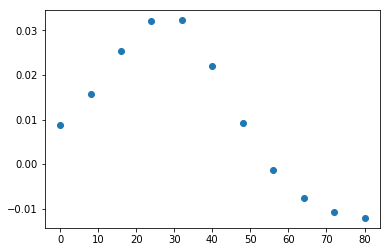

In [3]:
data = array([[0,0.0087],
              [8,0.0158],
              [16,0.0254],
              [24,0.0322],
              [32,0.0323],
              [40,0.0221],
              [48,0.0093],
              [56,-0.0013],
              [64,-0.0077],
              [72,-0.0108],
              [80,-0.0121]])
texp = data[:,0]
rRexp = data[:,1]
plt.plot(texp,rRexp,'o')

Concentration Catalyst= 3 g/L


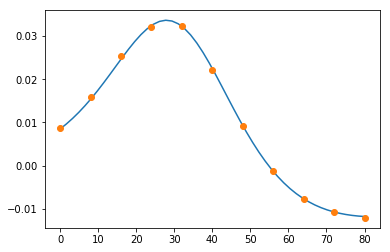

In [7]:
V = 1 #L assumed from fact that it's a batch and it is in liquid state
#ELEMENTARY autocatalytic reaction (NB)
CAo = 2 #mol/L
CRo = 0.1 #mol/L
CSo = 0 # 
k1 = 0.05 #L/mol.min 
k2prime = 0.005 #L/g.min 

w = 3 #guess mass catalyst in grams

def diff(C,t):
    CA, CR, CS = C
    rA1 = -k1*CA*CR
    rR1 = -rA1
    rR2 = -k2prime*CR*w/V
    rR = rR1 + rR2
    rS = -rR2*w/V
    dCAdt = rA1
    dCRdt = rR
    dCSdt = rS
    return [dCAdt, dCRdt, dCSdt]

tspan = linspace(0,80)

vals = odeint(diff,[CAo,CRo,CSo],tspan)
CA = vals[:,0]
CR = vals[:,1]
CS = vals[:,2]

C = CA, CR, CS
ri = diff(C,tspan)

rR = ri[1]

plt.plot(tspan,rR,'-',texp,rRexp,'o')

print('Concentration Catalyst=', w, 'g/L')